<a href="https://colab.research.google.com/github/zjzsu2000/CMPE297_AdvanceDL_Project/blob/main/Data_Preprocessing/Final_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, LSTM, Bidirectional, Input, Concatenate
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
option = pd.read_csv('/gdrive/My Drive/Data set/Option/WIX_call-options-black-scholes.csv')
model_lstm = load_model('/gdrive/Shareddrives/CMPE297_49_project/models/model1_lstm_call_1.h5')
model2 = load_model('/gdrive/Shareddrives/CMPE297_49_project/models/model2_call21_all_4000.h5')
model3= load_model('/gdrive/Shareddrives/CMPE297_49_project/models/model3_call_sigma5_all_1024_4000.h5')

In [3]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               2400      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               1

In [4]:
option.head()

,Unnamed: 0,Unnamed: 0.1,UnderlyingSymbol,UnderlyingPrice,Exchange,OptionSymbol,Blank,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega,Alias,sigma_5,sigma_10,sigma_21,sigma_30,date_diff,treasury_rate,black_scholes_pred_21
0,0,0,WIX,57.95,*,WIX180119C00040000,NaN,01/19/2018,1/2/2018 04:00:00 PM,40.0,17.90,17.00,20.30,0.0,12.0,2.0474,0.8556,0.8885,-17.1540,2.8402,NaN,NaN,NaN,NaN,NaN,17,1.29,NaN
1,2,2,WIX,57.95,*,WIX180119C00045000,NaN,01/19/2018,1/2/2018 04:00:00 PM,45.0,14.82,11.70,15.40,0.0,14.0,1.6263,0.8151,1.3130,-15.9985,3.3340,NaN,NaN,NaN,NaN,NaN,17,1.29,NaN
2,4,4,WIX,57.95,*,WIX180119C00050000,NaN,01/19/2018,1/2/2018 04:00:00 PM,50.0,9.20,7.70,9.60,0.0,24.0,0.9858,0.7884,2.3499,-10.5303,3.6168,NaN,NaN,NaN,NaN,NaN,17,1.29,NaN
3,6,6,WIX,57.95,*,WIX180119C00055000,NaN,01/19/2018,1/2/2018 04:00:00 PM,55.0,3.61,3.60,4.30,0.0,314.0,0.5262,0.6978,5.3048,-6.7828,4.3585,NaN,NaN,NaN,NaN,NaN,17,1.29,NaN
4,8,8,WIX,57.95,*,WIX180119C00060000,NaN,01/19/2018,1/2/2018 04:00:00 PM,60.0,1.45,1.15,1.65,181.0,726.0,0.5014,0.3950,6.1458,-7.1221,4.8110,NaN,NaN,NaN,NaN,NaN,17,1.29,NaN


In [5]:
option.OptionSymbol.value_counts()

WIX200117C00075000    394
WIX200117C00085000    394
WIX200117C00100000    394
WIX200117C00040000    394
WIX200117C00065000    394
                     ... 
WIX190920C00165000      8
WIX190920C00185000      8
WIX190920C00160000      8
WIX190920C00180000      8
WIX180316C00095000      5
Name: OptionSymbol, Length: 531, dtype: int64

In [6]:
test = option[option['OptionSymbol']=='WIX200117C00060000']

In [7]:
test = test[['UnderlyingPrice','Strike','Bid','Ask','sigma_21','date_diff','treasury_rate']]

In [8]:
test=test.dropna()

In [9]:
test

,UnderlyingPrice,Strike,Bid,Ask,sigma_21,date_diff,treasury_rate
1731,61.05,60.0,16.2,18.4,0.029875,716,2.14
1812,61.75,60.0,16.7,18.7,0.030058,715,2.16
1893,61.45,60.0,16.3,18.3,0.031937,714,2.15
1974,60.00,60.0,15.5,18.8,0.035571,711,2.08
2055,60.15,60.0,15.6,17.6,0.034691,710,2.10
...,...,...,...,...,...,...,...
50772,145.47,60.0,84.3,88.4,0.018441,176,2.08
50931,149.14,60.0,87.7,91.8,0.017786,175,2.10
51090,147.42,60.0,85.7,89.8,0.018002,172,2.10
51249,148.01,60.0,86.2,90.5,0.017308,171,2.07


In [10]:
test_x = test[['UnderlyingPrice','Strike','sigma_21','date_diff','treasury_rate']]
test_y = (test.Bid + test.Ask) /2

In [11]:
model2.evaluate(test_x,test_y,batch_size=1024)

1/1 [==============================] - 0s 2ms/step - loss: 0.9988


0.998781681060791

In [12]:
pred= model2.predict(test_x)

In [13]:
len(pred)

374

In [14]:
len(test_y)

374

In [15]:
test_y

1731     17.30
1812     17.70
1893     17.30
1974     17.15
2055     16.60
         ...  
50772    86.35
50931    89.75
51090    87.75
51249    88.35
51408    89.15
Length: 374, dtype: float64

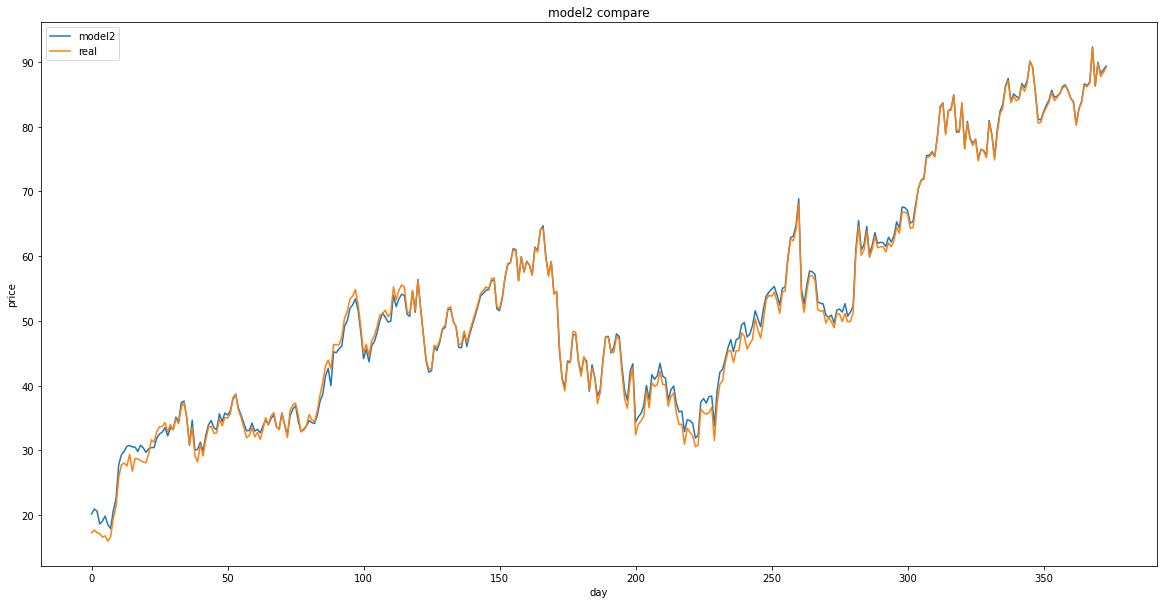

In [34]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))
plt.ylabel('price')
plt.xlabel('day')
plt.title('model2 compare')
plt.plot(pred,label = 'model2')  
plt.plot(test_y.values, label = 'real')
plt.legend()

In [16]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               2400      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               1

In [17]:
pre3=model3.predict(test_x)

In [28]:
len(pre3[:,0])

374

In [20]:
test_y3 = test[['Bid','Ask']]

In [24]:
test_yb = test_y3.Bid.values
test_ya = test_y3.Ask.values

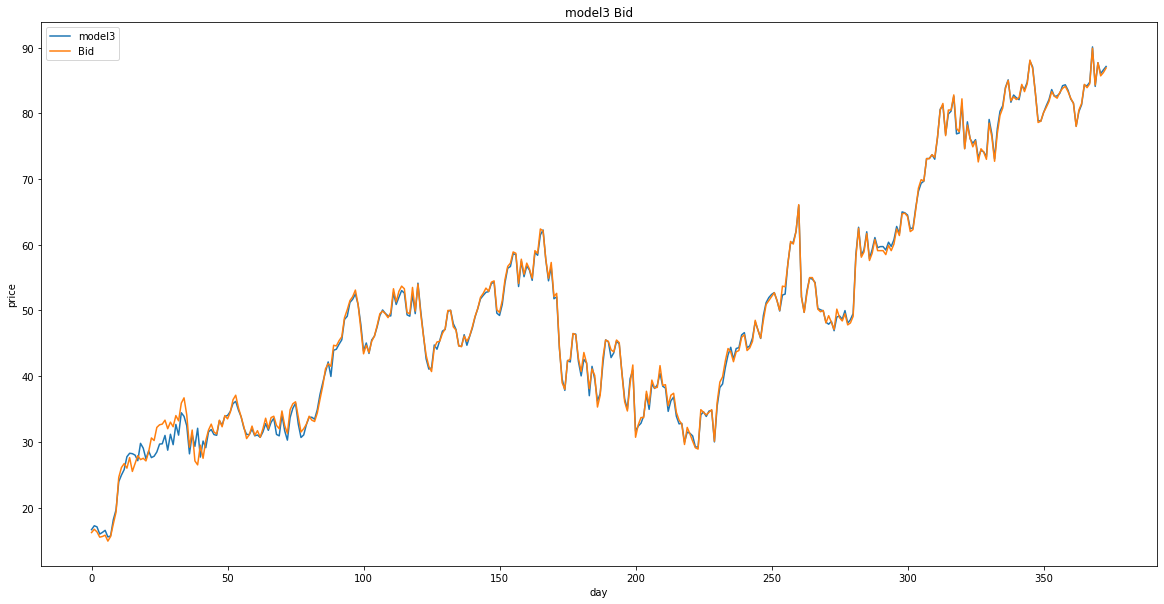

In [33]:
from matplotlib import pyplot as plt2
plt2.figure(figsize=(20, 10))
plt2.ylabel('price')
plt2.xlabel('day')
plt2.title('model3 Bid')
plt2.plot(pre3[:,0],label = 'model3') 
plt2.plot(test_yb, label = 'Bid')
plt2.legend() 

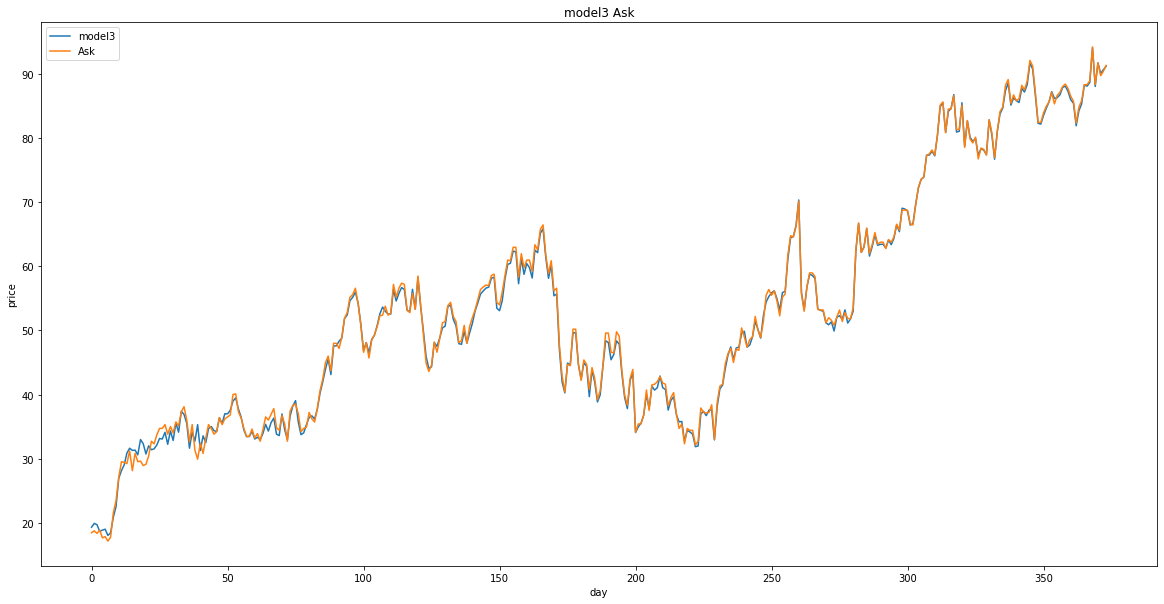

In [32]:
from matplotlib import pyplot as plt3
plt3.figure(figsize=(20, 10))
plt3.ylabel('price')
plt3.xlabel('day')
plt3.title('model3 Ask')
plt3.plot(pre3[:,1],label = 'model3') 
plt3.plot(test_ya, label = 'Ask')
plt3.legend() 